In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the dataset
df = pd.read_csv('Customers.csv')

In [7]:
# View the data to ensure it's loaded correctly
print(df.head())

   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


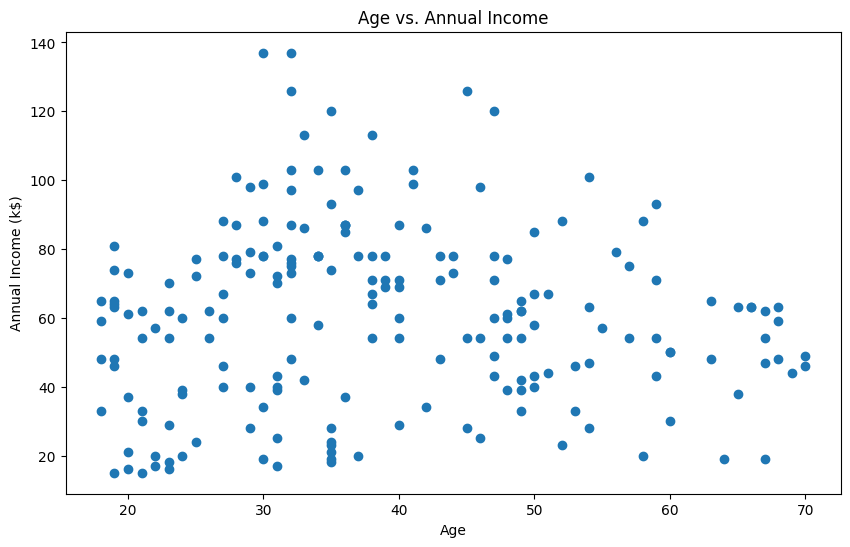

In [8]:
# Task 1: Plot age against annual income

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['AnnualIncome'])
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

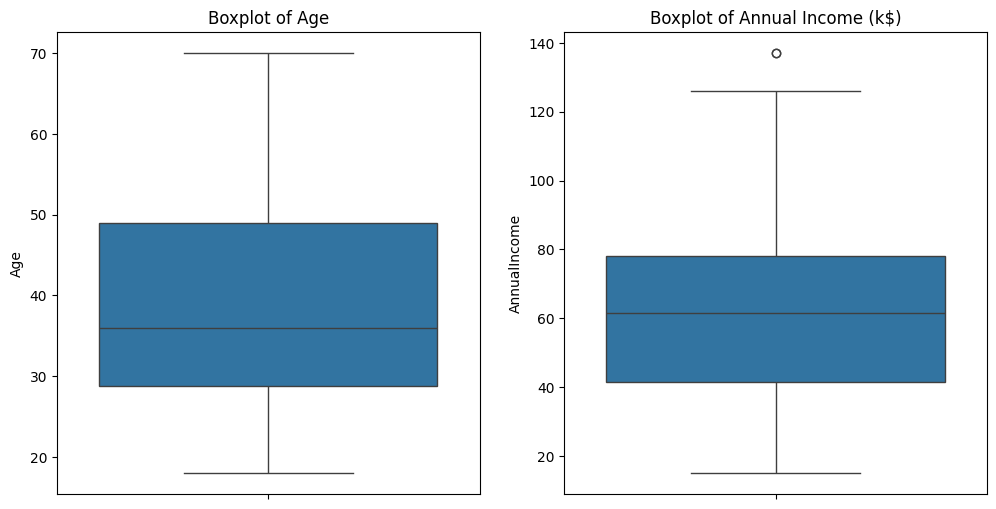

In [9]:
# Task 2: Check the outliers in age and annual income using boxplots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(df['AnnualIncome'])
plt.title('Boxplot of Annual Income (k$)')

plt.show()

In [10]:
# Capping the outliers in Age and Annual Income

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

df['Age'] = df['Age'].apply(lambda x: lower_bound_age if x < lower_bound_age else upper_bound_age if x > upper_bound_age else x)

Q1_income = df['AnnualIncome'].quantile(0.25)
Q3_income = df['AnnualIncome'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

df['AnnualIncome'] = df['AnnualIncome'].apply(lambda x: lower_bound_income if x < lower_bound_income else upper_bound_income if x > upper_bound_income else x)



In [11]:
# Task 3: Standardize the data for clustering

scaler = StandardScaler()
X = scaler.fit_transform(df[['Age', 'AnnualIncome']])

In [12]:
# Determine the optimal number of clusters using the Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


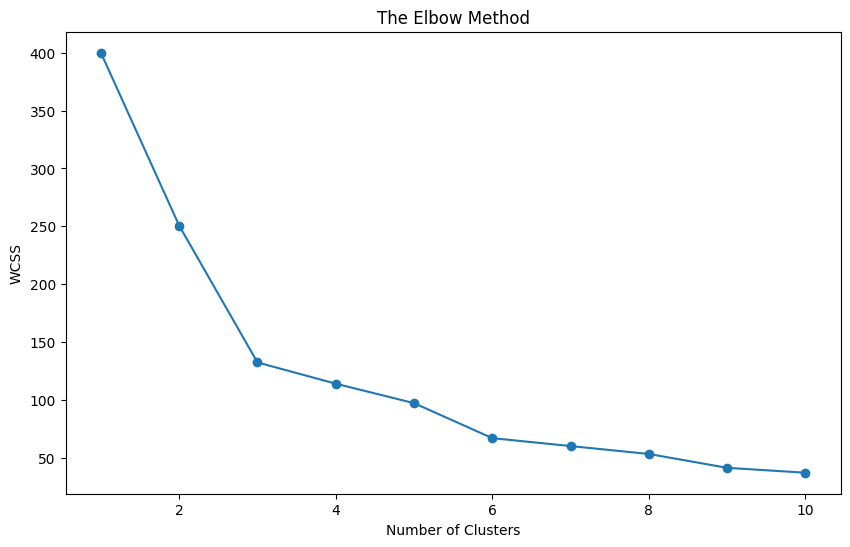

In [13]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


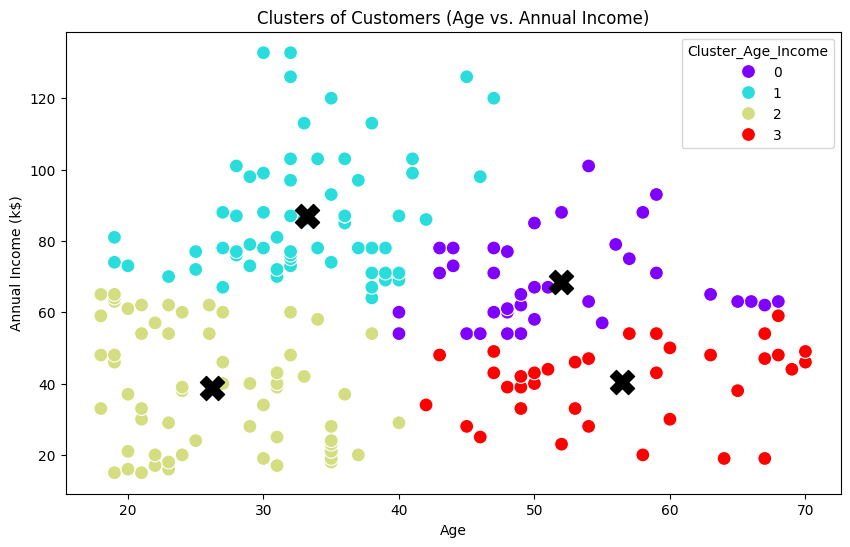

In [14]:
# Task 4: Visualize the optimal clusters with centroids

# Apply KMeans with the optimal number of clusters (let's assume 4 for this example)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df['Cluster_Age_Income'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster_Age_Income', data=df, palette='rainbow', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='black', marker='X')
plt.title('Clusters of Customers (Age vs. Annual Income)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

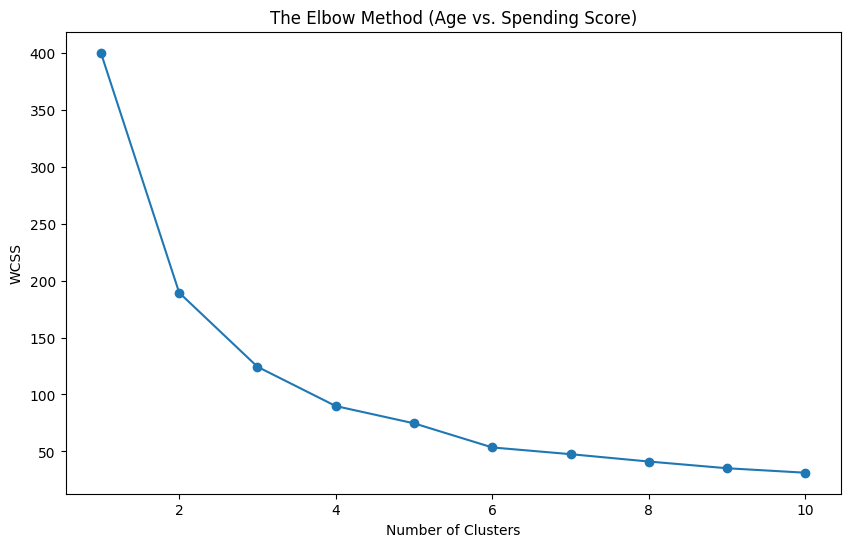

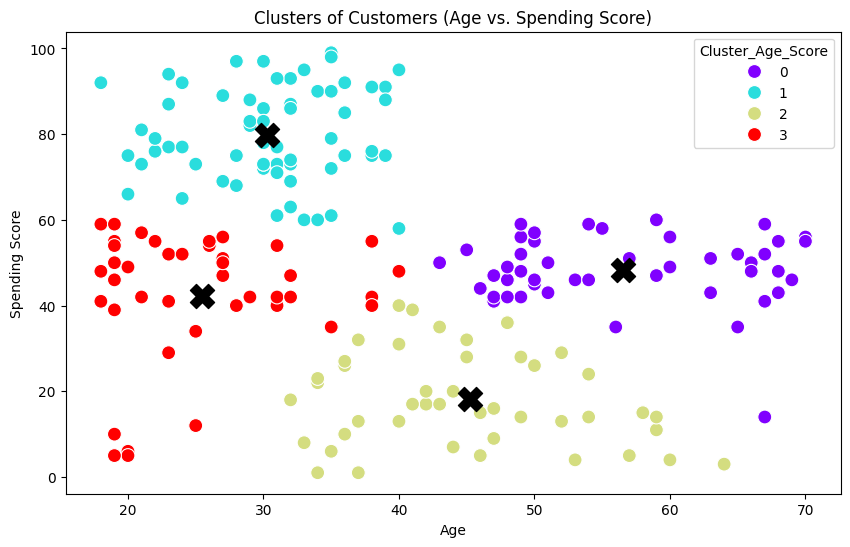

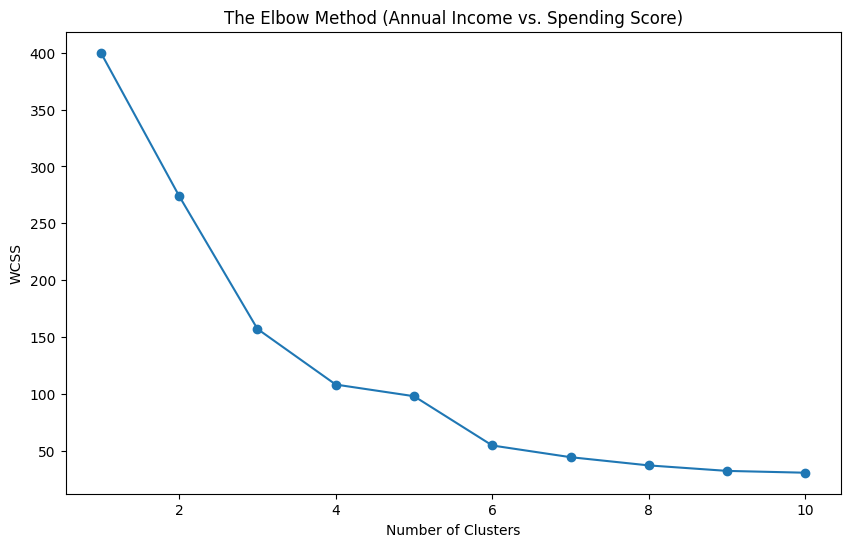

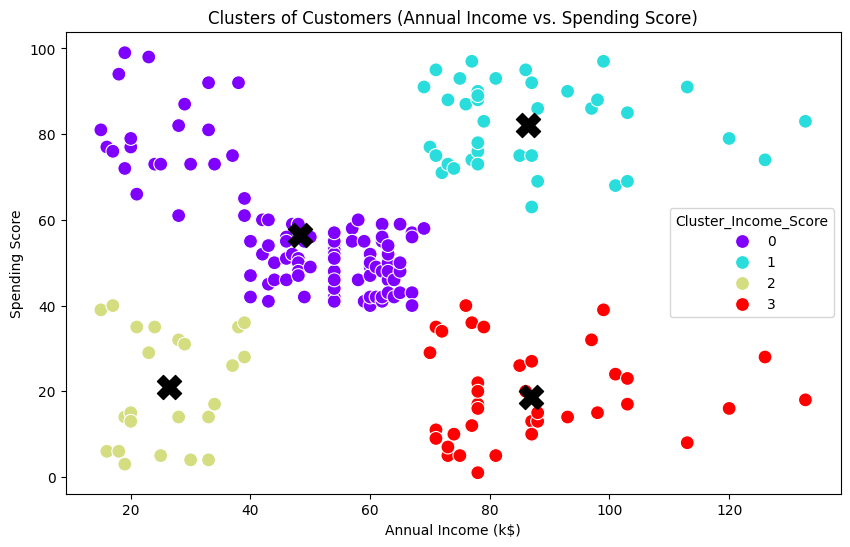

In [15]:
# Task 5: Repeat the clustering process for Age vs. Spending Score and Annual Income vs. Spending Score

# Standardize the data for Age vs Spending Score
X_age_score = scaler.fit_transform(df[['Age', 'SpendingScore']])

# Determine the optimal number of clusters for Age vs Spending Score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_age_score)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph for Age vs Spending Score
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method (Age vs. Spending Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans for Age vs Spending Score
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_age_score)

# Add the cluster labels to the original dataframe
df['Cluster_Age_Score'] = clusters

# Visualize the clusters for Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster_Age_Score', data=df, palette='rainbow', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='black', marker='X')
plt.title('Clusters of Customers (Age vs. Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Standardize the data for Annual Income vs Spending Score
X_income_score = scaler.fit_transform(df[['AnnualIncome', 'SpendingScore']])

# Determine the optimal number of clusters for Annual Income vs Spending Score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_income_score)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph for Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method (Annual Income vs. Spending Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans for Annual Income vs Spending Score
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_income_score)

# Add the cluster labels to the original dataframe
df['Cluster_Income_Score'] = clusters

# Visualize the clusters for Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster_Income_Score', data=df, palette='rainbow', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='black', marker='X')
plt.title('Clusters of Customers (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()
